<a href="https://colab.research.google.com/github/shalinivaggu/Twitter-sentiment-analysis/blob/main/twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tweepy

In [ ]:
import tweepy

# Replace these with your actual keys
API_KEY = "fyYzn43UQQsf236TNMwIVkR8q"
API_SECRET_KEY = "FGzpBIP1NHRlggtaH0CjWwowU28Eb8px3OR9pobGZLPBIaHxdL"
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAMmqxAEAAAAA74TGpw6fhVslBLIheJ1EtQVDrh0%3D4WnNKuptdzxS4fPAVaEHbJ8MuA5uTE3BzD28gechNvmCPGzY1X"

# Authenticate with Twitter API
client = tweepy.Client(bearer_token=BEARER_TOKEN)

# Test the connection
try:
    client.get_user(username="TwitterDev")  # Replace with any Twitter username
    print("Authentication Successful!")
except Exception as e:
    print("Error during authentication:", e)


Authentication Successful!


In [ ]:
# Define the query
query = "#pushpa2 -is:retweet lang:en"

# Fetch recent tweets (max 100 for basic access)
tweets = client.search_recent_tweets(query=query, max_results=10, tweet_fields=["created_at", "text"])

# Print the tweets
for tweet in tweets.data:
    print(f"Tweet: {tweet.text}\n")


Tweet: 👉"Which Language Led the Indian Box Office in 2024? Find Out Here!"💥💵
#Hindi #tamil #Telugu #malyalam #Kannada #BoxOffice #Pushpa2 #Pushpa2TheRule #Stree2 
https://t.co/fAXIJ07gDJ

Tweet: Check out the latest movie schedule and trailors !! Here's your guide to city's Cinemas, and show timings !! Click below to check more:
https://t.co/MVXuFAdgY2 !!
.
.
Keep rocking !! 
.
.
#IndoreRocks !!!🤘🏼🤘🏼🤘🏼 
https://t.co/SUbdsK4t6S !!! 🤘🏼🤘🏼🤘🏼 
.
.
#Pushpa2 #Barroz #Sabarmati https://t.co/zyPtjcCxq5

Tweet: புஷ்பா பட பாணியில் மது கடத்தல் 
#Pushpa2 #liquor #andhra #Chanakyaa 

stay informed with the latest news through Chanakyaa via https://t.co/sbYbLDGPqW https://t.co/wg3adyIgAD

Tweet: Actor on devine Mode❤️‍🔥&gt;&gt;&gt;  
#Pushpa2
https://t.co/CSySTdeoF8

Tweet: #Pushpa2 stampede case: Court to rule on #AlluArjun's bail plea today

https://t.co/IHKQVn34pD

Tweet: #Pushpa2TheRule  Box Office Collections: How Many Crores in Four Weeks? 

#AlluArjun #RashmikaMandanna #Pushpa2 #Sukumar #Tolly

In [ ]:
import pandas as pd

# Prepare tweet data
tweet_data = [{"Tweet": tweet.text, "Timestamp": tweet.created_at} for tweet in tweets.data]

# Create a DataFrame
df = pd.DataFrame(tweet_data)

# Save to CSV
df.to_csv("tweets.csv", index=False)

print("Tweets saved to tweets.csv!")


Tweets saved to tweets.csv!


In [ ]:
import re
from nltk.corpus import stopwords

# Download NLTK stopwords
import nltk
nltk.download('stopwords')

# Define cleaning function
def clean_tweet(tweet):
    tweet = re.sub(r"http\S+", "", tweet)  # Remove URLs
    tweet = re.sub(r"@\S+", "", tweet)    # Remove mentions
    tweet = re.sub(r"[^A-Za-z\s]", "", tweet)  # Remove special characters
    tweet = tweet.lower()  # Convert to lowercase
    tweet = " ".join(word for word in tweet.split() if word not in stopwords.words("english"))  # Remove stopwords
    return tweet

# Apply cleaning function
df["Cleaned_Tweet"] = df["Tweet"].apply(clean_tweet)

# Save cleaned data
df.to_csv("tweets_cleaned.csv", index=False)
print("Data cleaned successfully!")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Data cleaned successfully!


In [ ]:
pip install nltk

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis
def analyze_sentiment(tweet):
    score = sia.polarity_scores(tweet)["compound"]
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Cleaned_Tweet"].apply(analyze_sentiment)

# Save results
df.to_csv("tweets_with_sentiment.csv", index=False)
print("Sentiment analysis completed!")


Sentiment analysis completed!


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
pip install matplotlib

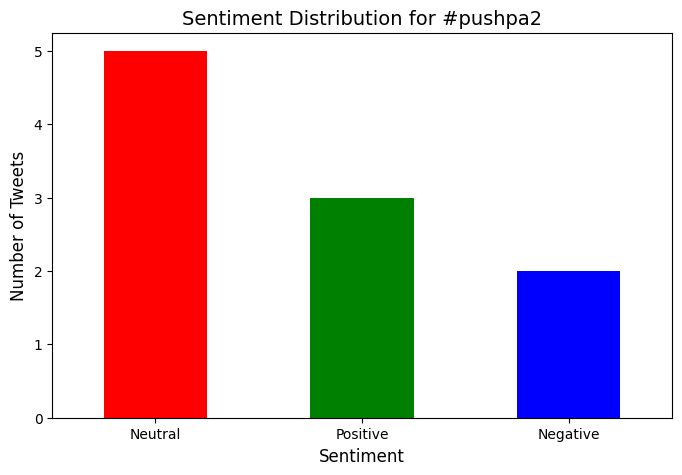

In [ ]:
import matplotlib.pyplot as plt

# Count sentiment values
sentiment_counts = df["Sentiment"].value_counts()

# Plot bar chart
sentiment_counts.plot(kind='bar', color=[ 'red','green', 'blue'], figsize=(8, 5))

# Customize plot
plt.title("Sentiment Distribution for #pushpa2", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Number of Tweets", fontsize=12)
plt.xticks(rotation=0)
plt.show()


In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


2025-01-03 07:24:56.298 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-03 07:24:56.561 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-01-03 07:24:56.564 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-03 07:24:56.568 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-03 07:24:56.571 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-03 07:24:56.576 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-03 07:24:56.578 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-03 07:24:56.579 Thread 'MainThread': mi

DeltaGenerator()

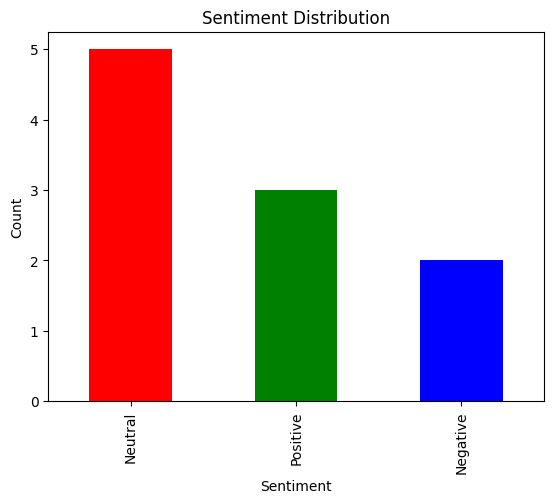

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("tweets_with_sentiment.csv")

# Sidebar filters
st.sidebar.title("Filters")
selected_sentiment = st.sidebar.multiselect("Select Sentiments", options=df["Sentiment"].unique(), default=df["Sentiment"].unique())

# Filtered data
filtered_df = df[df["Sentiment"].isin(selected_sentiment)]

# Display filtered data
st.write("Filtered Tweets", filtered_df)

# Plot sentiment distribution
sentiment_counts = filtered_df["Sentiment"].value_counts()
fig, ax = plt.subplots()
sentiment_counts.plot(kind='bar', ax=ax, color=[ 'red','green', 'blue'])
ax.set_title("Sentiment Distribution")
ax.set_xlabel("Sentiment")
ax.set_ylabel("Count")
st.pyplot(fig)


In [ ]:
pip install wordcloud

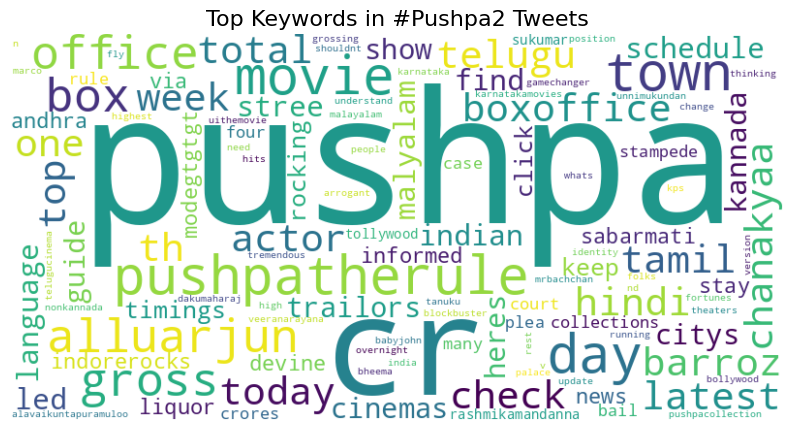

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned tweets into one string
all_words = " ".join(df['Cleaned_Tweet'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Keywords in #Pushpa2 Tweets", fontsize=16)
plt.show()


In [ ]:
sentiment_counts = df["Sentiment"].unique()
sentiment_counts

array(['Neutral', 'Negative', 'Positive'], dtype=object)